In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [32]:
df = pd.read_csv('MSFT.csv')

In [33]:
df = df.reset_index()
df.head()

index        Date      Open      High       Low     Close  Adj Close  \
0      0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061109   
1      1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063292   
2      2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064384   
3      3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.062746   
4      4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.061655   

       Volume  
0  1031788800  
1   308160000  
2   133171200  
3    67766400  
4    47894400

In [34]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

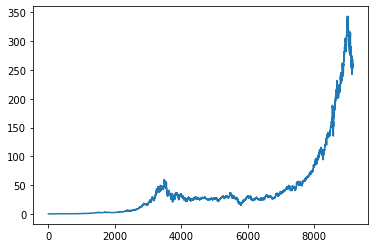

In [35]:
plt.plot(df.Close)

In [36]:
# MOVING AVERAGE OF 100 
ma100 = df.Close.rolling(100).mean()

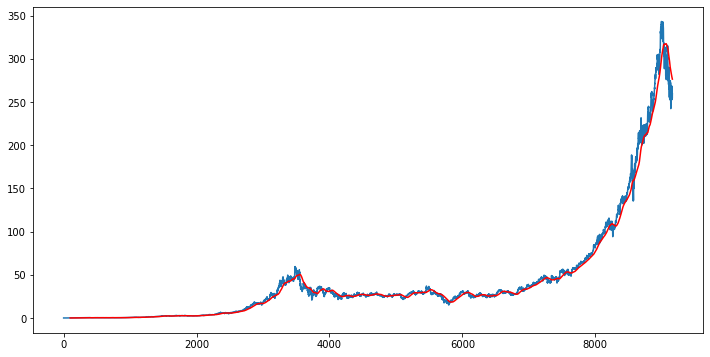

In [37]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

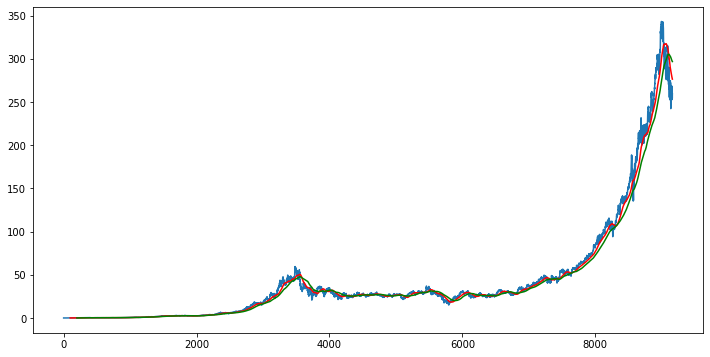

In [38]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [39]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

In [40]:
data_training.shape, data_testing.shape

((6413, 1), (2749, 1))

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [42]:
train = scaler.fit_transform(data_training)

In [43]:
x_train = []
y_train = []

In [44]:
for i in range(100, train.shape[0]):
    x_train.append(train[i-100:i])
    y_train.append(train[i,0])
    
x_train

[array([[1.16760393e-04],
        [1.75140589e-04],
        [2.04347502e-04],
        [1.60545540e-04],
        [1.31355442e-04],
        [8.75702946e-05],
        [4.37851473e-05],
        [0.00000000e+00],
        [2.91900982e-05],
        [7.29752455e-05],
        [1.02165344e-04],
        [8.75702946e-05],
        [7.29752455e-05],
        [8.75702946e-05],
        [1.02165344e-04],
        [1.02165344e-04],
        [7.29752455e-05],
        [8.75702946e-05],
        [1.16760393e-04],
        [1.31355442e-04],
        [1.60545540e-04],
        [1.75140589e-04],
        [1.75140589e-04],
        [2.33537600e-04],
        [2.48132649e-04],
        [1.89752453e-04],
        [1.89752453e-04],
        [1.60545540e-04],
        [1.67843065e-04],
        [3.35702944e-04],
        [4.52480151e-04],
        [4.67075200e-04],
        [4.08678189e-04],
        [3.64893042e-04],
        [3.35702944e-04],
        [3.35702944e-04],
        [3.21107895e-04],
        [3.35702944e-04],
        [3.3

In [45]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [46]:
type(x_train[12])

numpy.ndarray

In [47]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [48]:
input_shape = x_train.shape

In [49]:
input_shape

(6313, 100, 1)

In [50]:
import tensorflow as tf
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

In [52]:
model.build(input_shape)

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (6313, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (6313, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (6313, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (6313, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (6313, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (6313, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (6313, 120)               9

In [55]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
198/198 [==============================] - 60s 272ms/step - loss: 0.0100
Epoch 2/50
198/198 [==============================] - 57s 288ms/step - loss: 0.0040
Epoch 3/50
198/198 [==============================] - 55s 279ms/step - loss: 0.0030
Epoch 4/50
198/198 [==============================] - 55s 278ms/step - loss: 0.0029
Epoch 5/50
198/198 [==============================] - 54s 272ms/step - loss: 0.0026
Epoch 6/50
198/198 [==============================] - 54s 275ms/step - loss: 0.0024
Epoch 7/50
198/198 [==============================] - 70s 352ms/step - loss: 0.0024
Epoch 8/50
198/198 [==============================] - 55s 279ms/step - loss: 0.0021
Epoch 9/50
198/198 [==============================] - 58s 291ms/step - loss: 0.0020
Epoch 10/50
198/198 [==============================] - 55s 276ms/step - loss: 0.0021
Epoch 11/50
198/198 [==============================] - 53s 270ms/step - loss: 0.0019
Epoch 12/50
198/198 [==============================] - 56s 283ms/step - lo

In [57]:
model.save('Stock.h5')